# Import Libraries and Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
data = pd.read_csv('GlobalTemperatures.csv')


# Data Exploration and Cleaning

* Explore the dataset to understand the structure and any missing values.
* Filter out rows with significant missing data if needed.


In [2]:
# View the first few rows
data.head()

# Check for missing values
data.isnull().sum()

# Drop rows with missing temperature data
data.dropna(subset=['LandAverageTemperature'], inplace=True)

# Convert date column to datetime format
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)


# Exploratory Data Analysis (EDA)

* Visualize trends in temperature over time.
* Check seasonality, trends, and outliers in the data.

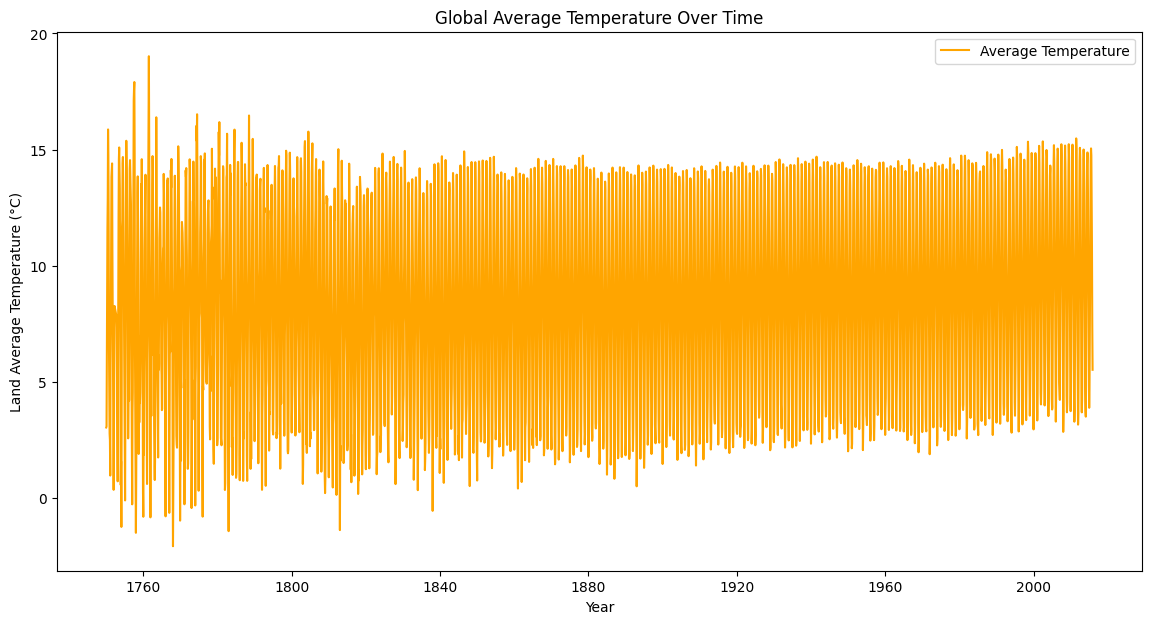

In [3]:
# Plot global average temperature over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['LandAverageTemperature'], color='orange', label='Average Temperature')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.title('Global Average Temperature Over Time')
plt.legend()
plt.show()


# Feature Engineering# 

In [4]:
# Create year and month columns
data['Year'] = data.index.year
data['Month'] = data.index.month


# Split Data into Training and Test Sets

In [5]:
# Train-Test split (80-20%)
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]


# Model Selection
****Model 1: Linear Regression****

In [6]:
# Define features and target
X_train = train[['Year', 'Month']]
y_train = train['LandAverageTemperature']
X_test = test[['Year', 'Month']]
y_test = test['LandAverageTemperature']

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2 Score:", r2_lr)


Linear Regression MSE: 16.314788843098796
Linear Regression R2 Score: 0.05513425057801913


**Model 2: Exponential Smoothing (Time Series)**

In [7]:
# Exponential Smoothing
exp_model = ExponentialSmoothing(train['LandAverageTemperature'], seasonal='add', seasonal_periods=12)
exp_model_fit = exp_model.fit()

# Forecast on the test set
y_pred_exp = exp_model_fit.forecast(len(test))

# Evaluate
mse_exp = mean_squared_error(test['LandAverageTemperature'], y_pred_exp)
r2_exp = r2_score(test['LandAverageTemperature'], y_pred_exp)

print("Exponential Smoothing MSE:", mse_exp)
print("Exponential Smoothing R2 Score:", r2_exp)


E:\adse_ii_assignments\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Exponential Smoothing MSE: 0.3590981057053713
Exponential Smoothing R2 Score: 0.9792029486849998


E:\adse_ii_assignments\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\adse_ii_assignments\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Model Evaluation

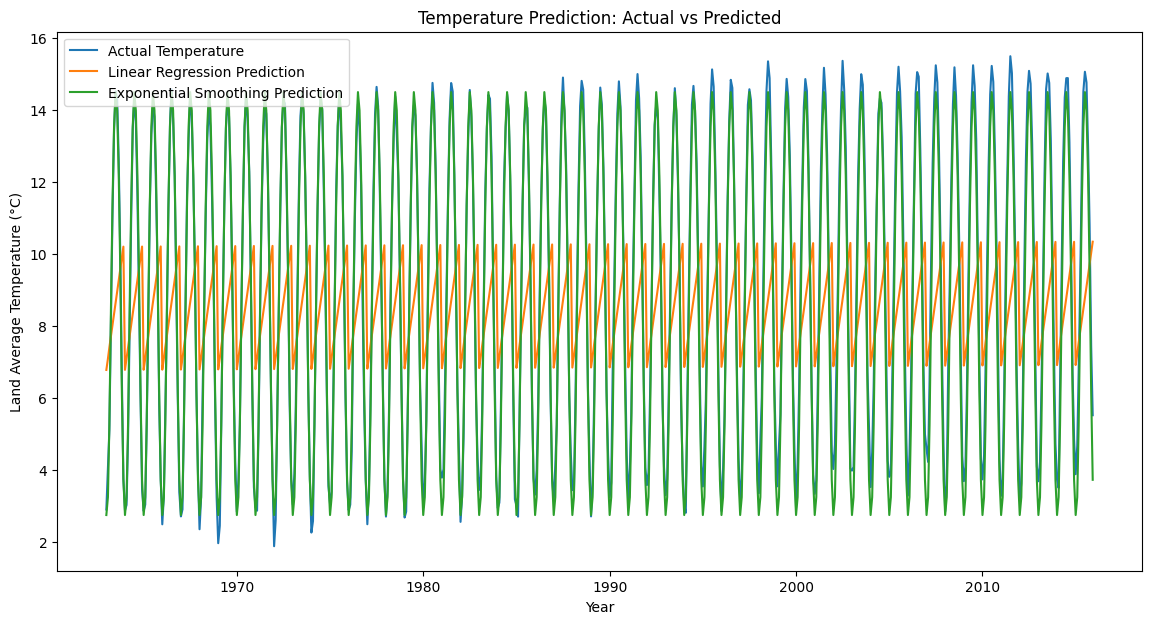

In [8]:
# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['LandAverageTemperature'], label='Actual Temperature')
plt.plot(test.index, y_pred_lr, label='Linear Regression Prediction')
plt.plot(test.index, y_pred_exp, label='Exponential Smoothing Prediction')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.title('Temperature Prediction: Actual vs Predicted')
plt.legend()
plt.show()
